# Classification using logistic regression in one variable

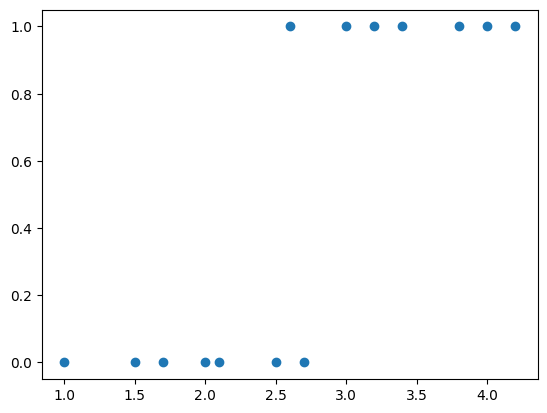

In [55]:
import numpy as np 
import matplotlib.pyplot as plt 

# Constructing dataset
# tumor size and milignancy
dataset = [
    (1.0, 0),
    (1.5, 0),
    (1.7, 0),
    (2.0, 0),
    (2.1, 0),
    (2.5, 0),
    (2.6, 1),
    (2.7, 0),
    (3.0, 1),
    (3.2, 1),
    (3.4, 1),
    (3.8, 1),
    (4.0, 1),
    (4.2, 1)
]

X = np.array([item[0] for item in dataset])
Y = np.array([item[1] for item in dataset])

# plot
plt.scatter(X, Y)
plt.show()

In [56]:
# rescaling
X_mean = np.mean(X)
X_range = np.ptp(X)  # peak-to-peak

X -= X_mean
X /= X_range

In [57]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [58]:
import random

w = random.uniform(-1,1)
b = random.uniform(-1,1)

N = len(Y)

def update(lr):
    global w, b 

    Y_pred = sigmoid(w * X + b)

    dw = -sum( (Y - Y_pred)*X ) / N 
    db = -sum( (Y - Y_pred) ) / N 

    w -= lr * dw
    b -= lr * db

    J = sum( (Y - Y_pred)**2 ) / (2 * N)

    return J

In [59]:
if __name__ == "__main__":
    lr = 10

    J = []
    J.append(update(lr))
    J.append(update(lr))
    
    while True: 
        J.append(update(lr))

        if abs(J[-2] - J[-1]) < 10**(-6):
            print(J[-1])
            print(len(J))
            break

0.0266268313801306
209


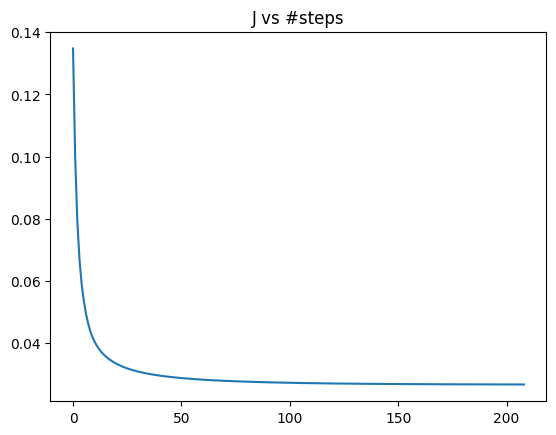

In [60]:
x = np.arange(len(J))

plt.title("J vs #steps")
plt.plot(x, J)
plt.show()

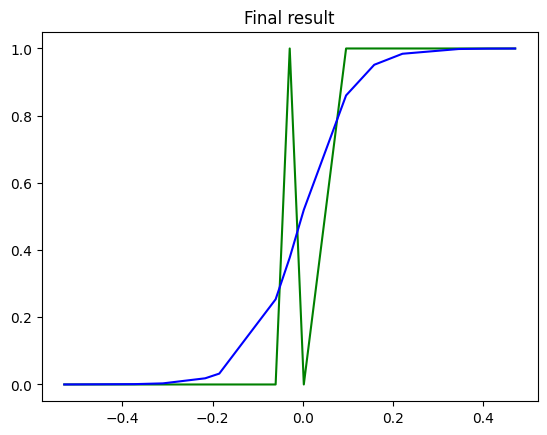

In [61]:
Y_pred = sigmoid(w * X + b)

plt.title("Final result")

plt.plot(X, Y, color='g')
plt.plot(X, Y_pred, color='b')

plt.show()